#### **Exercise 1:**

Repeat the curve fitting example with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend

[1.26654551 0.95492436]


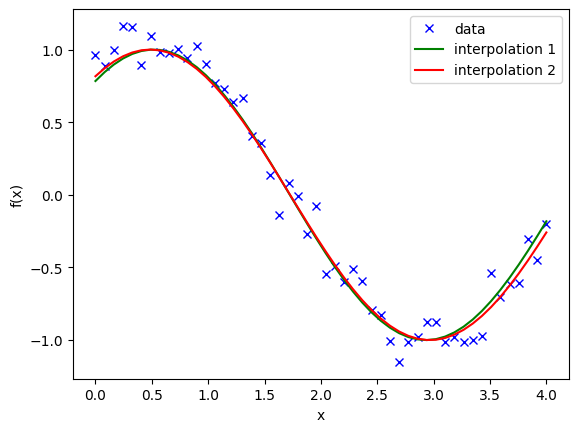

In [58]:
from scipy import optimize

np.random.seed(0)

# Let's generate fake data that we can "fit" then 
def f(x, a, phi):
    return np.sin(a * x + phi)

#random makes it look like experimental data
x = np.linspace(0, 4, 50)
y = f(x, 1.3, 0.9) + .1*np.random.normal(size=50)

data = np.column_stack((x,y))
np.savetxt('data.txt', data, fmt='%f')

x_read, y_read= np.loadtxt('data.txt', unpack=True)
# Now fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x, y)

print(params)

# plot the data and the fitted curve
plt.plot(x, y, 'bx', label='data')
plt.plot(x,f(x,1.3,0.9),'g-', label='interpolation 1')
plt.plot(x, f(x, *params), 'r-', label='interpolation 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

#### **Exercise 2:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

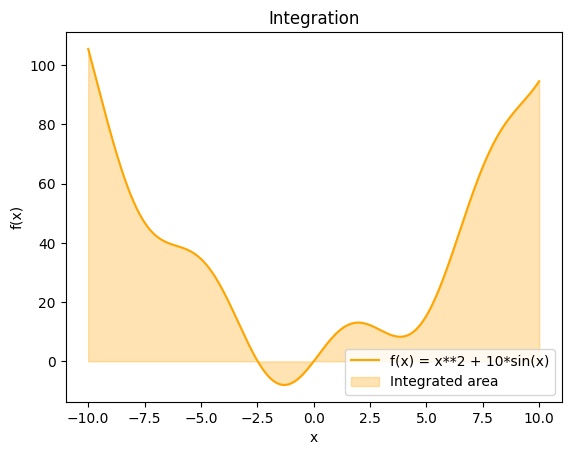

Sympy Result: 666.666666666667
Scipy Result: (666.6666666666667, 7.655722985888797e-12)


In [45]:
import numpy as np
from scipy.integrate import quad

def func(x):
    return x**2 + 10*np.sin(x)

x_values = np.linspace(-10, 10, 1000)
y_values = func(x_values)

result = quad(func, -10, 10)

# Symbolic integration using sympy
x = sp.symbols('x')
f_sym = x**2 + 10*sp.sin(x)
area_sym = sp.integrate(f_sym, (x, -10, 10))

plt.plot(x_values, y_values, label=f'f(x) = {f_sym}', color='orange')
plt.fill_between(x_values, y_values, color='orange', alpha=0.3, label='Integrated area')
plt.title('Integration')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print("Sympy Result:", area_sym.evalf())
print("Scipy Result:", result)


#### **Exercise 3**

With the help of documentation find 3 different ways to interpolate data produced from the function 
`np.cos(-x**2/9.0)`. 
Create a class called "My_Interpolation" with these 3 interpolation methods.

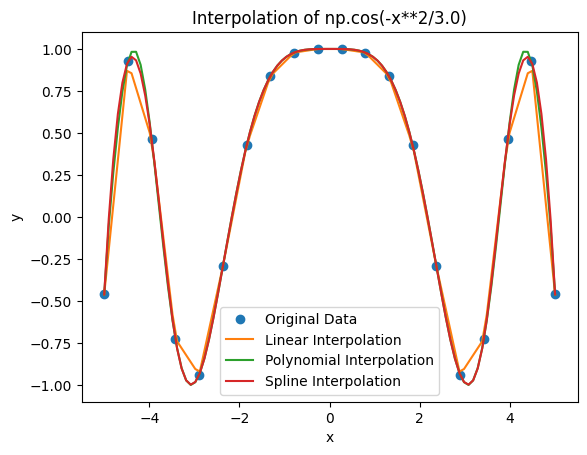

In [51]:
import numpy as np
from scipy.interpolate import interp1d, lagrange, splrep, splev
import matplotlib.pyplot as plt

class My_Interpolation:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def linear_interpolation(self, new_x):
        f_linear = interp1d(self.x, self.y, kind='linear')
        return f_linear(new_x)

    def polynomial_interpolation(self, new_x):
        f_poly = lagrange(self.x, self.y)
        return f_poly(new_x)

    def spline_interpolation(self, new_x):
        tck = splrep(self.x, self.y, s=0)
        return splev(new_x, tck)

# generating data
x = np.linspace(-5, 5, 20)
y = np.cos(-x**2/3.0)

# Creating an instance of My_Interpolation
interpolator = My_Interpolation(x, y)

# Generating new x values for interpolation
new_x_values = np.linspace(-5, 5, 100)

# Interpolating using different methods
y_linear = interpolator.linear_interpolation(new_x_values)
y_poly = interpolator.polynomial_interpolation(new_x_values)
y_spline = interpolator.spline_interpolation(new_x_values)

plt.plot(x, y, 'o', label='Original Data')
plt.plot(new_x_values, y_linear, label='Linear Interpolation')
plt.plot(new_x_values, y_poly, label='Polynomial Interpolation')
plt.plot(new_x_values, y_spline, label='Spline Interpolation')
plt.legend()
plt.title('Interpolation of np.cos(-x**2/3.0)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
#### **Exercise 4:**
Give students in the `example.csv` file a bonus of 5 for all the courses. Find a way to replace all the values that are now greater than 30 by 30. Save the new data to a file. Make a plot with histograms for every course in the example file.

#### **Exercise 5:**

 - Read in the `cars.csv` file as a dataframe
 - Remove the row with the index 3, which contains a quote in the Model column.
 - Add a new column called Price with the following values: [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
 - Find the average Length of all the vehicles.
 - Find the median Price of all the vehicles.
 - Create a new dataframe that only contains the rows where the Price is greater than 7000.
 - Sort the dataframe in descending order by the Price column.


#### **Exercise 6:**
 - create a random matrix with numpy
 - save it to file
 - read it back with numpy
 - calculate some statistcs on it with numpy 
 - read the same file with pandas
 - calculate the same statistics on it with pandas